### This NLP model for information extraction from documents

- _Datasets_: 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y

- __Loading packages and libraries__

In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#This is for checking the sequence of the program using pause
def pause():
    #programPause = raw_input("Press the <ENTER> key to continue...") #PY2.7
    programPause = input("Press the <ENTER> key to continue...") #PY3.0

- __Loading the text datasets__

In [3]:
#Folder path and accessing several Session files at a time
# folders = glob.glob('/Users/preethamvignesh/Downloads/Converted sessions/Session*')
folders = glob.glob('/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/Converted sessions/Session*')
folders[0:5]

['/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/Converted sessions/Session 73 - 2018',
 '/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/Converted sessions/Session 29 - 1974',
 '/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/Converted sessions/Session 50 - 1995',
 '/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/Converted sessions/Session 64 - 2009',
 '/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/Converted sessions/Session 51 - 1996']

In [4]:
#Each session contain several docs and no specified columns and making a dataframe
# Dataframe
speech_df = pd.DataFrame(columns={'country','speech','session','year'})
speech_df

,session,country,year,speech


In [5]:
#Different country speeches and collect them particular country and put it into a column
#different country speeches but I am getting only India
i = 0
for file in folders:
    speech = glob.glob(file+'/IND*.txt')          #select country
    #print(speech)
    
    with open(speech[0],encoding = 'utf8') as f:
        
        #speech
        speech_df.loc[i,'speech'] = f.read()
        
        #year
        speech_df.loc[i,'year'] = speech[0].split('_')[-1].split('.')[0]
        
        #session
        speech_df.loc[i,'session'] = speech[0].split('_')[-2]
        
        #country
        speech_df.loc[i,'country'] = speech[0].split('_')[0].split("/")[-1]
        #print(speech[0])
        
        #increment
        i += 1
        
speech_df.head()

,session,country,year,speech
0,73,ML,2018,"On my own behalf and on behalf of my country, ..."
1,29,ML,1974,"Mr. President, I have already had occasion to ..."
2,50,ML,1995,It gives me great pleasure to\ncongratulate Mr...
3,64,ML,2009,I offer my congratulations \nto Mr. Treki on h...
4,51,ML,1996,﻿It gives me great pleasure to\ncongratulate A...


- __Text preprocessing__

In [6]:
#Preprocess the speech from each document ( cleaning the text)

def preprocess_text(sentence):
    #removal of HTTP links/URLs mixed up in any text
    sentence = re.sub('http://\S+|https://\S+', '', sentence)
    
    #removal of any references outside the text
    sentence = re.sub("[\(\[].*?[\)\]]", "", str(sentence))
    
    #removal of newline characters
    sentence = re.sub('\n',' ',str(sentence))
    sentence = re.sub('\n','',str(sentence))
    
    #removal of apostrophers
    sentence = re.sub("'s",'',str(sentence))
    
    #removal of numbers in pargraphs
    sentence = re.sub('[0-9]+.\t','',str(sentence))
    
    #removal of hyphens in any sentences
    sentence = re.sub("-",' ',str(sentence))
    sentence = re.sub("— ",'',str(sentence))
    
    #removal of salutations in the sentences
    sentence = re.sub("Mr\.",'Mr',str(sentence))
    sentence = re.sub("Mrs\.",'Mrs',str(sentence))
    
    #removal of quation marks in the sentences
    sentence = re.sub('\"','',str(sentence))
    
    return sentence

speech_df['speech_clean'] = speech_df["speech"].apply(preprocess_text)
speech_df.head()

,session,country,year,speech,speech_clean
0,73,ML,2018,"On my own behalf and on behalf of my country, ...","On my own behalf and on behalf of my country, ..."
1,29,ML,1974,"Mr. President, I have already had occasion to ...","Mr President, I have already had occasion to c..."
2,50,ML,1995,It gives me great pleasure to\ncongratulate Mr...,It gives me great pleasure to congratulate Mr ...
3,64,ML,2009,I offer my congratulations \nto Mr. Treki on h...,I offer my congratulations to Mr Treki on his...
4,51,ML,1996,﻿It gives me great pleasure to\ncongratulate A...,﻿It gives me great pleasure to congratulate Am...


In [7]:
# Split the paragraphs into sentences, if any available in the document.

def para2sent(sentences):
    sentences = re.split('[.?]',sentences)
    new_sentences = []
    for sent in sentences:
        new_sentences.append(sent)
    
    return new_sentences

speech_df['sentences'] = speech_df['speech_clean'].apply(para2sent)
speech_df.head()

,session,country,year,speech,speech_clean,sentences
0,73,ML,2018,"On my own behalf and on behalf of my country, ...","On my own behalf and on behalf of my country, ...","[On my own behalf and on behalf of my country,..."
1,29,ML,1974,"Mr. President, I have already had occasion to ...","Mr President, I have already had occasion to c...","[Mr President, I have already had occasion to ..."
2,50,ML,1995,It gives me great pleasure to\ncongratulate Mr...,It gives me great pleasure to congratulate Mr ...,[It gives me great pleasure to congratulate Mr...
3,64,ML,2009,I offer my congratulations \nto Mr. Treki on h...,I offer my congratulations to Mr Treki on his...,[I offer my congratulations to Mr Treki on hi...
4,51,ML,1996,﻿It gives me great pleasure to\ncongratulate A...,﻿It gives me great pleasure to congratulate Am...,[﻿It gives me great pleasure to congratulate A...


In [8]:
#Counting the words in each year for each sentence and making into a different data frame

#create a data frame containing word count for each sentence
wrdcnt_df = pd.DataFrame(columns=["Senten","Year","Wrdcnt"])

row_list = []
for i in range(len(speech_df)):
    for sntce in speech_df.loc[i,'sentences']:
        
        wordcount = len(sntce.split())
        year = speech_df.loc[i,'year']
        
        dict1 = {'Year':year, "Senten":sntce, "Wrdcnt":wordcount}
        row_list.append(dict1)
        
    wrdcnt_df = pd.DataFrame(row_list)
    
wrdcnt_df.head()
    

,Year,Senten,Wrdcnt
0,2018,"On my own behalf and on behalf of my country, ...",35
1,2018,"As a woman, I feel doubly proud that this hon...",15
2,2018,"I also recall, with equal pride, that the fir...",32
3,2018,I also thank former President Miroslav Lajčák...,19
4,2018,We received the tragic news this m...,16


In [9]:
wrdcnt_df.shape

(7259, 3)

In [10]:
wrdcnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    7259 non-null   object
 1   Senten  7259 non-null   object
 2   Wrdcnt  7259 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 170.3+ KB


In [11]:
wrdcnt1_df = wrdcnt_df.copy()
wrdcnt1_df['Date'] = wrdcnt1_df['Year'].astype('datetime64')
wrdcnt1_df

,Year,Senten,Wrdcnt,Date
0,2018,"On my own behalf and on behalf of my country, ...",35,2018-01-01
1,2018,"As a woman, I feel doubly proud that this hon...",15,2018-01-01
2,2018,"I also recall, with equal pride, that the fir...",32,2018-01-01
3,2018,I also thank former President Miroslav Lajčák...,19,2018-01-01
4,2018,We received the tragic news this m...,16,2018-01-01
...,...,...,...,...
7254,2014,In preparing and implementing the post 2015 ...,17,2014-01-01
7255,2014,"For 2015, let us come together to give a new ...",25,2014-01-01
7256,2014,The year 2015 should be a banner year in his...,15,2014-01-01
7257,2014,I hope that we will all live up to its promise,11,2014-01-01


In [12]:
def yrly_cnt(data):
    data = data.copy()
    #Changing the object to datetime64
    data['Date'] = pd.to_datetime(data['Date'])

    #Yearly sum of wordcnt values
    data = data.groupby(pd.Grouper(freq='Y', key='Date'))['Wrdcnt'].sum().reset_index()
    
    return data

yrly_wrdcnt = yrly_cnt(wrdcnt1_df)
yrly_wrdcnt.head()

,Date,Wrdcnt
0,1970-12-31,3537
1,1971-12-31,7115
2,1972-12-31,4208
3,1973-12-31,5327
4,1974-12-31,2445


In [13]:
yrly_wrdcnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    49 non-null     datetime64[ns]
 1   Wrdcnt  49 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 912.0 bytes


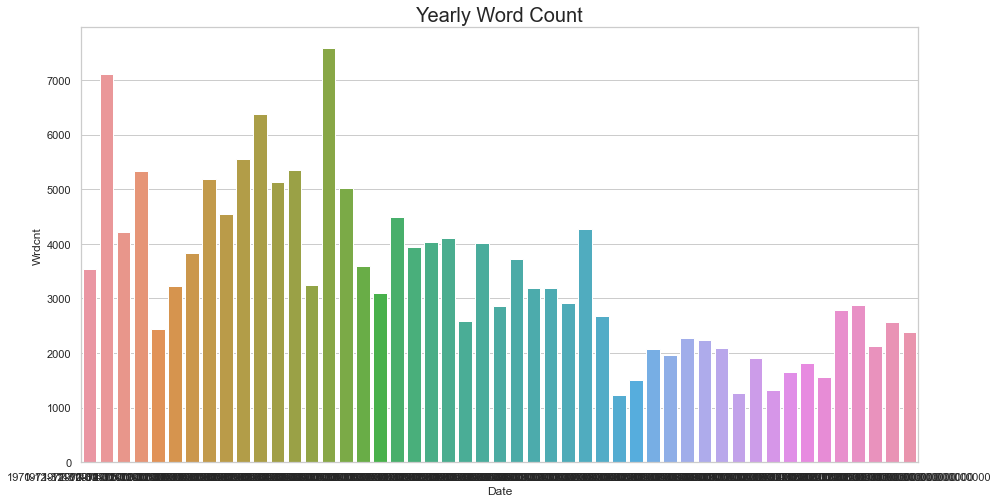

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.set_theme(style="whitegrid")
sns.barplot(x="Date", y="Wrdcnt", data=yrly_wrdcnt)
plt.title('Yearly Word Count', fontsize = 20)

xx = yrly_wrdcnt.index.values.astype('datetime64[D]')
# xx = yrly_wrdcnt['Date']
# print(xx)
yy = yrly_wrdcnt['Wrdcnt']
# ticks = np.arange(xx[0], xx[-1], (xx[-1] - xx[0]).astype('timedelta64[D]') / 20)
# plt.xticks(ticks, ticks)
# plt.gca().tick_params('x', labelrotation=90, labelsize=10)
# plt.show()

#### Information extraction from SpaCy

In [15]:
#start working on the task of information extraction, for that I am using
#SpaCy library working with text datasets

import spacy
from spacy.matcher import Matcher

from spacy import displacy
import visualise_spacy_tree     #creating tree type structure
from IPython.display import Image,display

#load English language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [16]:
# function to find sentences containing PMs of India
def find_names(text):
    
    names = []
    cntt =0
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'prime'},
              {'LOWER':'minister'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
    
    # Only keep sentences containing Indian PMs
    for name in names:
        if (name.split()[2] == 'of') and (name.split()[3] != "India"):
            #cntt += 1
            #print(cntt,names)
            names.remove(name)
            
    return names

# apply function
wrdcnt_df['PM_Names'] = wrdcnt_df['Senten'].apply(find_names)


In [17]:
# look at sentences for a specific year
for i in range(len(wrdcnt_df)):
    if wrdcnt_df.loc[i,'Year'] in ['1984']:
        if len(wrdcnt_df.loc[i,'PM_Names'])!=0:
            print('->',wrdcnt_df.loc[i,'Senten'],'\n')

->  In November 1948, the first Prime Minister of India, Pandit Jawaharlal Nehru, addressing the General Assembly' on behalf of newly independent India, stated that the Charter of the United Nations, in noble language, had laid down the principles and purposes of that great Organization, and he thought it would not be possible to improve upon that language 

->  As Prime Minister Indira Gandhi said in her address to the Seventh Conference of Heads of State or Government of Non Aligned Countries, held at New Delhi from 7 to 12 March 1983: Its significance is not to be measured by the number of divisions or the megatons of destructive power we command, but by the intensity with which we desire peace and freedom, development and international justice 

->  A major peace initiative in this regard was taken recently by the Prime Minister of India, Mrs Indira Gandhi, together with the Heads of State or Government of Argentina, Greece, Mexico, Sweden and the United Republic of Tanzania 

->  

In [21]:
%run -i 'clrstr.py'
    
# look at sentences for a specific year
for i in range(len(wrdcnt_df)):
    if wrdcnt_df.loc[i,'Year'] in ['1984']:
        if len(wrdcnt_df.loc[i,'PM_Names'])!=0:
            strr = wrdcnt_df.loc[i,'Senten']
            clrstr(strr,pstr="Prime")
            #print('->',df2.loc[i,'Sent'],'\n')

->  In November 1948, the first Prime Minister of India, Pandit Jawaharlal Nehru, addressing the General Assembly' on behalf of newly independent India, stated that the Charter of the United Nations, in noble language, had laid down the principles and purposes of that great Organization, and he thought it would not be possible to improve upon that language
->  As Prime Minister Indira Gandhi said in her address to the Seventh Conference of Heads of State or Government of Non Aligned Countries, held at New Delhi from 7 to 12 March 1983: Its significance is not to be measured by the number of divisions or the megatons of destructive power we command, but by the intensity with which we desire peace and freedom, development and international justice
->  A major peace initiative in this regard was taken recently by the Prime Minister of India, Mrs Indira Gandhi, together with the Heads of State or Government of Argentina, Greece, Mexico, Sweden and the United Republic of Tanzania
->  After 